In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
path = './_data.csv'
data = pd.read_csv(path)
part_1 = data.iloc[:, :13]

In [14]:
part_1_re = part_1
part_1_re['Цена'] = part_1_re['Цена'].str.split(' ').str[0]
part_1_re['Площадь, м2'] = part_1_re['Площадь, м2'].str.split('/').str[0]
part_1_re['Количество комнат'] = part_1_re['Количество комнат'].str.split(',').str[0]
part_1_re['Цена'] = pd.to_numeric(part_1_re['Цена'], errors='coerce')
part_1_re['Площадь, м2'] = pd.to_numeric(part_1_re['Площадь, м2'], errors='coerce')
part_1_re['Количество комнат'] = pd.to_numeric(part_1_re['Количество комнат'], errors='coerce')
part_1_re

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт
0,0,271271157,4.0,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,500000.0,+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский
1,1,271634126,4.0,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,500000.0,+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский
2,2,271173086,4.0,Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0,5/16,подземная,500000.0,"+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт
3,3,272197456,4.0,Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0,5/6,подземная,400000.0,"+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт
4,4,273614615,2.0,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0,"12/26, Панельный",NaN,225000.0,+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,10/14,NaN,42000.0,+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,Евроремонт
23364,23364,274654844,1.0,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7,"5/18, Монолитный",NaN,45000.0,+79151173402,Сдам однокомнатную квартиру на длительный срок...,Евроремонт
23365,23365,268679909,2.0,Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,50000.0,+79653825192,Рассматриваются квартиранты только славяне и т...,Дизайнерский
23366,23366,274807525,2.0,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5,"8/23, Монолитный",наземная,55000.0,+79660611965,Двухкомнатная уютная квартира с видом во внутр...,Евроремонт


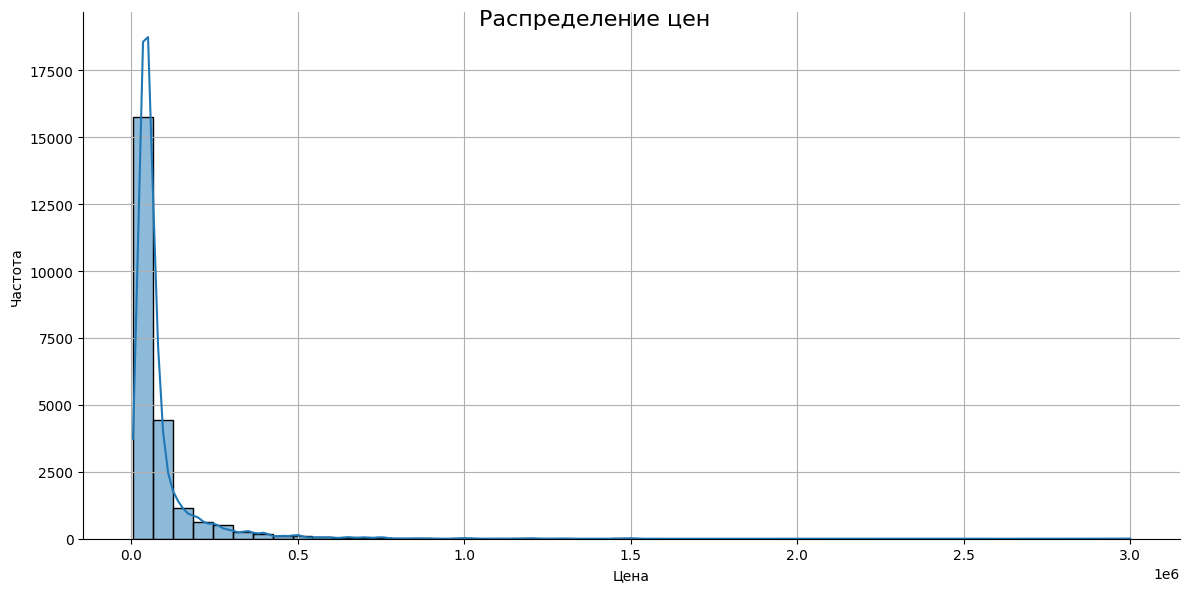

In [17]:
price_hist = sns.displot(part_1_re['Цена'], bins=50, kde=True, height=6, aspect=2)
price_hist.fig.suptitle('Распределение цен', fontsize=16)
price_hist.set_axis_labels('Цена', 'Частота')
plt.grid()

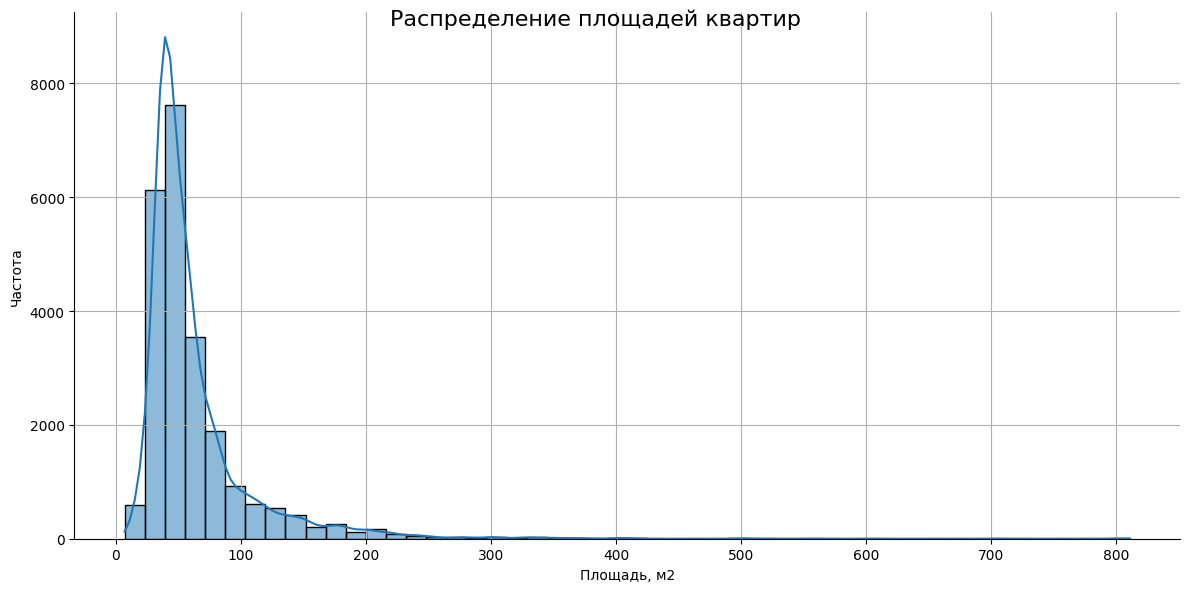

In [31]:
square_hist = sns.displot(part_1_re['Площадь, м2'], bins=50, kde=True, height=6, aspect=2)
square_hist.fig.suptitle('Распределение площадей квартир', fontsize=16)
square_hist.set_axis_labels('Площадь, м2', 'Частота')
plt.grid()

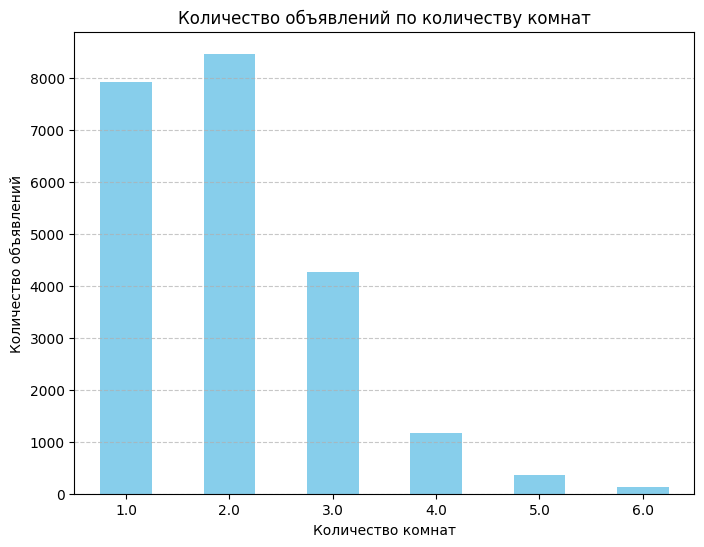

In [33]:
counts = part_1_re['Количество комнат'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Количество объявлений по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Text(0, 0.5, 'Цена (руб.)')

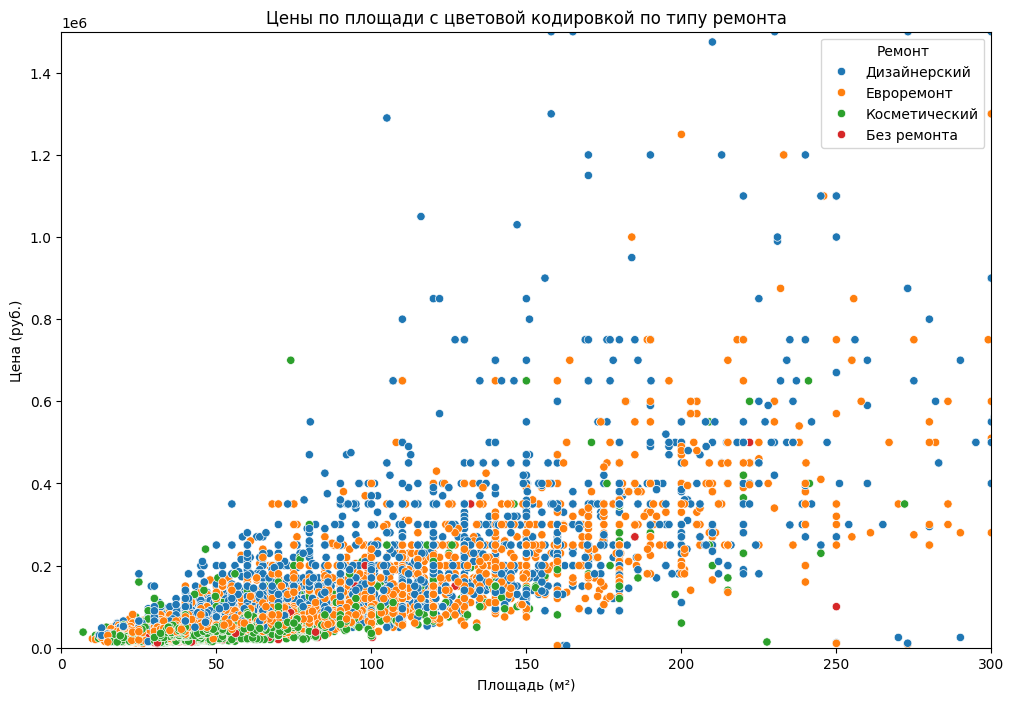

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=part_1_re, x='Площадь, м2', y='Цена', hue='Ремонт')
plt.title('Цены по площади с цветовой кодировкой по типу ремонта')
plt.xlim(0, 300)
plt.ylim(0, 1500000)
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена (руб.)')

Text(0, 0.5, 'Цена (руб.)')

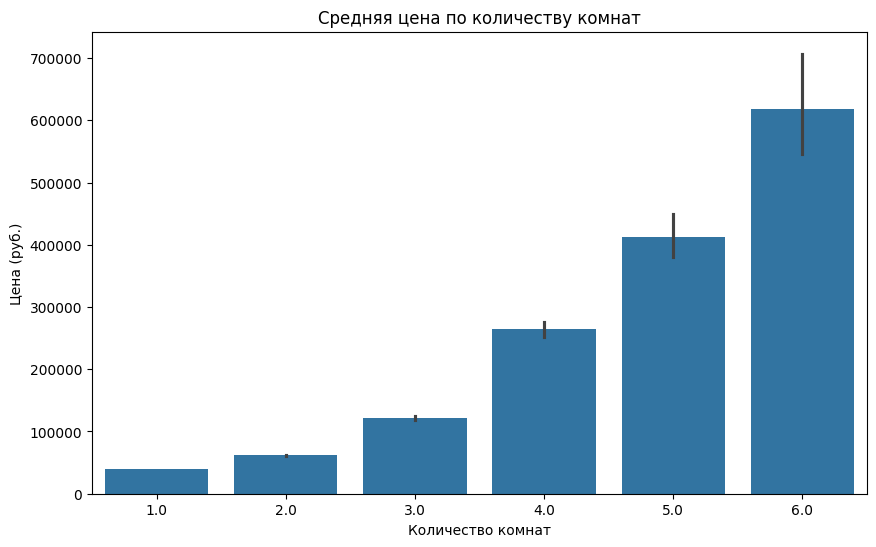

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=part_1_re, x='Количество комнат', y='Цена', estimator=lambda x: sum(x)/len(x))
plt.title('Средняя цена по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена (руб.)')